# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

For the final paper I would like to look at the relationship between EV charging stations an Calenviroscreen census tract scores. Since EVs are some of the most heavily publicized parts of the green energy transition, it will be interesting to look at where California is in terms of its infrastructure network.

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
def get_charging_stations(api_key, fuel_type='ELEC', state=None, limit=10):
    base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'
    params = {
        'api_key': api_key,
        'fuel_type': fuel_type,
        'limit': limit
    }
    if state:
        params['state'] = state

    response = requests.get(base_url, params=params)
    data = response.json()
    df = pd.json_normalize(json.loads(response.text))
    return data['fuel_stations']


In [3]:

api_key = 'vD3YcIQ4aCof8MDagGScFZRFlGg9fVvpw1SJbvwv'

def get_charging_stations(api_key, fuel_type='ELEC', state=None, limit=10):
    base_url = 'https://developer.nrel.gov/api/alt-fuel-stations/v1.json'
    params = {
        'api_key': api_key,
        'fuel_type': fuel_type,
        'limit': limit,
        'state': state
    }
    response = requests.get(base_url, params=params)
    results = response.text
    data = response.json()
    filtered_data = data['fuel_stations']
    fuel_stations = pd.json_normalize(filtered_data,sep='_')
    return fuel_stations
    


charging_stations = get_charging_stations(api_key, state='CA', limit='all')


In [4]:

charging_stations.sample(5)


,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,maximum_vehicle_class,open_date,owner_type_code,restricted_access,status_code,facility_type,station_name,station_phone,updated_at,geocode_status,latitude,longitude,city,country,intersection_directions,plus4,state,street_address,zip,bd_blends,cng_dispenser_num,cng_fill_type_code,cng_has_rng,cng_psi,cng_renewable_source,cng_total_compression,cng_total_storage,cng_vehicle_class,e85_blender_pump,e85_other_ethanol_blends,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,hy_is_retail,hy_pressures,hy_standards,hy_status_link,lng_has_rng,lng_renewable_source,lng_vehicle_class,lpg_nozzle_types,lpg_primary,ng_fill_type_code,ng_psi,ng_vehicle_class,rd_blended_with_biodiesel,rd_blends,rd_blends_fr,rd_max_biodiesel_level,nps_unit_name,access_days_time_fr,intersection_directions_fr,bd_blends_fr,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids_station,ev_network_ids_posts,federal_agency_id,federal_agency_code,federal_agency_name
9325,public,24 hours daily,None,None,2024-03-19,None,ELEC,Public,183298,None,2021-01-27,None,None,E,None,META MPK22-02 FC,888-758-4389,2024-03-19T00:55:32Z,GPS,37.481841,-122.165909,Menlo Park,US,None,None,CA,309 Constitution Dr,94025,None,None,None,None,None,None,None,None,None,None,None,"[CHADEMO, J1772COMBO]",1.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Public,None,[USCPIL2071761],[2465291],NaN,NaN,NaN
17760,public,24 hours daily,None,None,2024-03-19,None,ELEC,Public,329497,None,2024-02-29,None,None,E,None,CAL PAIN EV CPC- EV3,888-758-4389,2024-03-19T00:47:13Z,GPS,36.841768,-119.757148,Fresno,US,None,None,CA,7255 N Cedar Ave,93720,None,None,None,None,None,None,None,None,None,None,None,[J1772],NaN,NaN,1.0,ChargePoint Network,http://www.chargepoint.com/,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Public,None,[USCPIL815201],[1082891],NaN,NaN,NaN
3038,public,24 hours daily,None,None,2024-03-19,None,ELEC,Public,158921,None,2020-06-12,None,None,E,None,JOHN MUIR HLTH VISITOR LOT #2,888-758-4389,2024-03-19T00:50:33Z,GPS,37.982145,-122.032517,Concord,US,None,None,CA,2540 East St,94520,None,None,None,None,None,None,None,None,None,None,None,[J1772],NaN,NaN,2.0,ChargePoint Network,http://www.chargepoint.com/,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Public,None,[USCPIL1872911],"[9279721, 9279731]",NaN,NaN,NaN
1883,private,For employee use only,None,None,2023-04-06,None,ELEC,Private,123340,LD,2019-05-01,P,None,E,OFFICE_BLDG,Verizon - Ontario,None,2024-01-31T22:07:01Z,200-8,34.062845,-117.535337,Ontario,US,None,None,CA,5351 E Airport Dr,91761,None,None,None,None,None,None,None,None,None,None,None,[J1772],NaN,NaN,4.0,Non-Networked,None,None,None,None,True,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Privé,None,NaN,NaN,NaN,NaN,NaN
3467,public,24 hours daily,None,None,2024-03-19,None,ELEC,Public,159542,None,2020-06-12,None,None,E,None,SDIA T2PP 1,888-758-4389,2024-03-19T00:40:52Z,GPS,32.729997,-117.202429,San Diego,US,None,None,CA,2707 N Harbor Dr,92101,None,None,None,None,None,None,None,None,None,None,None,[J1772],NaN,NaN,2.0,ChargePoint Network,http://www.chargepoint.com/,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Public,None,[USCPIL424121],"[577091, 577101]",NaN,NaN,NaN


In [7]:
charging_stations_simple = charging_stations[["access_code", "access_days_time", "date_last_confirmed", "fuel_type_code", "groups_with_access_code", "id", "open_date", "facility_type", "station_name", "latitude", "longitude", "city", "country", "street_address", "zip"]]
charging_stations_simple

,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,facility_type,station_name,latitude,longitude,city,country,street_address,zip
0,private,Fleet use only,2023-09-14,ELEC,Private,1517,1999-10-15,UTILITY,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,11797 Truesdale St,91352
1,public,5:30am-9pm; pay lot,2023-01-10,ELEC,Public,1523,1995-08-30,PARKING_GARAGE,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,1201 S Figueroa St,90015
2,private,For fleet and employee use only,2023-09-14,ELEC,Private,1525,1999-10-15,UTILITY,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,111 N Hope St,90012
3,private,Fleet use only,2024-01-09,ELEC,Private,1531,2018-05-01,UTILITY,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,6801 E 2nd St,90803
4,private,Fleet use only,2024-01-09,ELEC,Private,1552,1999-10-15,UTILITY,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,161 N Island Ave,90744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,public,24 hours daily,2024-03-19,ELEC,Public,330765,2024-03-19,None,BLVD MASTER MADISON,37.707042,-121.897877,Dublin,US,5578 Structure Wy,94568
17852,public,24 hours daily,2024-03-19,ELEC,Public,330774,2024-03-19,None,SYCAMORE DOUBLE RIGHT,38.547998,-121.759476,Davis,US,609 Anderson Rd,95616
17853,public,24 hours daily,2024-03-19,ELEC,Public,330775,2024-03-19,None,SYCAMORE DOUBLE LEFT,38.547972,-121.759406,Davis,US,609 Anderson Rd,95616
17854,public,24 hours daily,2024-03-19,ELEC,Public,330776,2024-03-19,None,SYCAMORE SINGLE,38.547978,-121.759479,Davis,US,609 Anderson Rd,95616


In [9]:
charging_stations_simple.info

<bound method DataFrame.info of       access_code                 access_days_time date_last_confirmed  \
0         private                   Fleet use only          2023-09-14   
1          public              5:30am-9pm; pay lot          2023-01-10   
2         private  For fleet and employee use only          2023-09-14   
3         private                   Fleet use only          2024-01-09   
4         private                   Fleet use only          2024-01-09   
...           ...                              ...                 ...   
17851      public                   24 hours daily          2024-03-19   
17852      public                   24 hours daily          2024-03-19   
17853      public                   24 hours daily          2024-03-19   
17854      public                   24 hours daily          2024-03-19   
17855      public                             None          2024-03-19   

      fuel_type_code                groups_with_access_code      id  \
0       

In [10]:
charging_stations_simple.dtypes

access_code                 object
access_days_time            object
date_last_confirmed         object
fuel_type_code              object
groups_with_access_code     object
id                           int64
open_date                   object
facility_type               object
station_name                object
latitude                   float64
longitude                  float64
city                        object
country                     object
street_address              object
zip                         object
dtype: object

In [12]:
charging_stations_simple_copy = charging_stations_simple.copy()
charging_stations_simple_copy['zip'] = pd.to_numeric(charging_stations_simple_copy['zip'], errors='coerce')
charging_stations_simple_copy = charging_stations_simple_copy.dropna(subset=['zip'])
charging_stations_simple_copy['zip'] = charging_stations_simple_copy['zip'].astype(int)
charging_stations_simple_copy


,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,facility_type,station_name,latitude,longitude,city,country,street_address,zip
0,private,Fleet use only,2023-09-14,ELEC,Private,1517,1999-10-15,UTILITY,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,11797 Truesdale St,91352
1,public,5:30am-9pm; pay lot,2023-01-10,ELEC,Public,1523,1995-08-30,PARKING_GARAGE,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,1201 S Figueroa St,90015
2,private,For fleet and employee use only,2023-09-14,ELEC,Private,1525,1999-10-15,UTILITY,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,111 N Hope St,90012
3,private,Fleet use only,2024-01-09,ELEC,Private,1531,2018-05-01,UTILITY,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,6801 E 2nd St,90803
4,private,Fleet use only,2024-01-09,ELEC,Private,1552,1999-10-15,UTILITY,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,161 N Island Ave,90744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,public,24 hours daily,2024-03-19,ELEC,Public,330765,2024-03-19,None,BLVD MASTER MADISON,37.707042,-121.897877,Dublin,US,5578 Structure Wy,94568
17852,public,24 hours daily,2024-03-19,ELEC,Public,330774,2024-03-19,None,SYCAMORE DOUBLE RIGHT,38.547998,-121.759476,Davis,US,609 Anderson Rd,95616
17853,public,24 hours daily,2024-03-19,ELEC,Public,330775,2024-03-19,None,SYCAMORE DOUBLE LEFT,38.547972,-121.759406,Davis,US,609 Anderson Rd,95616
17854,public,24 hours daily,2024-03-19,ELEC,Public,330776,2024-03-19,None,SYCAMORE SINGLE,38.547978,-121.759479,Davis,US,609 Anderson Rd,95616


In [14]:

charging_stations_simple_copy.dtypes


access_code                 object
access_days_time            object
date_last_confirmed         object
fuel_type_code              object
groups_with_access_code     object
id                           int64
open_date                   object
facility_type               object
station_name                object
latitude                   float64
longitude                  float64
city                        object
country                     object
street_address              object
zip                          int64
dtype: object

In [15]:
charging_stations_simple.describe(include=object)

,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,open_date,facility_type,station_name,city,country,street_address,zip
count,17812,16509,17806,17812,17812,17786,3206,17812,17809,17812,17806,17812
unique,2,461,48,1,16,2417,60,17416,798,1,9757,1249
top,public,24 hours daily,2024-03-19,ELEC,Public,2021-01-27,HOTEL,Target - Tesla Supercharger,Los Angeles,US,2910 Tannery Way,94025
freq,16974,14254,14117,17812,15208,4020,516,34,1755,17812,87,388


In [16]:
calenviroscreen = pd.read_csv("/Users/danamorgan/Documents/CP255/Final Project Data/calenviroscreen_tracts.csv")

In [17]:
calenviroscreen

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Lead,Lead Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),0.060,82.48,13.906348,97.71,1.123,98.72,733.95,84.39,89.60,96.47,1.00,42.90,4859.094604,92.20,1037.095744,60.38,70.50,98.19,54.25,91.17,3.100,96.31,0,0.00,6.00,79.95,78.98,9.64,99.93,129.54,97.22,7.80,95.62,21.47,92.25,44.5,93.23,16.0,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),0.046,44.98,11.884085,72.59,0.538,91.15,389.85,41.55,77.30,86.83,63.13,73.66,519.628001,52.35,856.395935,48.29,61.90,97.46,78.60,95.09,1.270,88.58,13,91.87,9.25,89.28,73.43,8.97,99.29,105.88,94.22,6.88,88.72,20.26,88.12,46.4,94.47,29.7,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),0.048,53.73,12.251640,89.21,0.781,96.55,787.94,92.53,92.56,98.40,0.00,0.00,3682.693278,87.73,2522.622269,92.84,38.75,92.96,20.50,68.92,11.620,99.66,7,66.74,4.85,73.08,77.67,9.48,99.86,76.10,82.76,7.11,90.89,20.87,90.15,52.2,97.39,17.1,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),0.060,82.48,13.520939,95.88,0.174,57.09,733.95,84.39,68.39,77.00,44.57,71.59,1630.342707,74.93,690.502159,35.28,16.50,77.32,9.50,44.83,2.360,94.12,0,0.00,5.75,78.14,67.85,8.28,97.40,139.45,98.24,10.65,99.78,22.68,94.57,41.4,90.94,15.7,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),0.060,82.48,13.818959,97.47,1.390,99.30,733.95,84.39,75.41,85.12,16.63,64.41,1975.207988,78.96,909.650882,52.26,10.50,62.45,28.25,78.05,0.350,56.40,0,0.00,0.00,0.00,66.83,8.16,96.94,139.08,98.17,10.25,99.67,22.64,94.43,43.6,92.57,20.0,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6107004000,582,Tulare,93257,Porterville,-118.983849,36.038061,NaN,NaN,NaN,0.060,82.48,13.179824,94.49,0.051,18.62,634.32,71.15,NaN,NaN,941.23,88.72,7.549169,8.23,NaN,NaN,0.00,0.00,0.00,0.00,0.100,16.64,1,12.45,0.00,0.00,42.35,5.17,49.58,61.64,71.09,NaN,NaN,21.22,91.55,43.6,92.57,NaN,NaN,79.6,99.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,-120.537071,37.891939,NaN,NaN,NaN,0.057,75.12,9.232356,40.96,0.082,30.55,393.19,42.73,NaN,NaN,0.00,0.00,60.236734,19.45,341.220852,10.41,0.00,0.00,3.00,22.12,0.050,7.35,0,0.00,2.00,52.90,26.37,3.22,10.90,68.79,77.57,NaN,NaN,22.89,95.01,34.1,84.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6111001206,778,Ventura,93001,Unincorporated Ventura County area,-119.371944,34.343903,NaN,NaN,NaN,0.043,26.85,8.224548,16.74,0.030,10.47,406.95,44.81,54.27,57.62,877.39,88.45,29.930066,14.32,1384.689620,74.98,13.30,71.

In [18]:
calenviroscreen.rename(columns={'ZIP': 'zip'}, inplace=True)

In [19]:
calenviro_2 = calenviroscreen.iloc[:, 0:10]
calenviro_2


,Census Tract,Total Population,California County,zip,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores)
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores)
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores)
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores)
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores)
...,...,...,...,...,...,...,...,...,...,...
8030,6107004000,582,Tulare,93257,Porterville,-118.983849,36.038061,NaN,NaN,NaN
8031,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,-120.537071,37.891939,NaN,NaN,NaN
8032,6111001206,778,Ventura,93001,Unincorporated Ventura County area,-119.371944,34.343903,NaN,NaN,NaN
8033,6111003012,675,Ventura,93036,Oxnard,-119.180105,34.235076,NaN,NaN,NaN


In [21]:
calenviro_2.dtypes

Census Tract                  int64
Total Population              int64
California County            object
zip                           int64
Approximate Location         object
Longitude                   float64
Latitude                    float64
CES 4.0 Score               float64
CES 4.0 Percentile          float64
CES 4.0 Percentile Range     object
dtype: object

In [23]:

#need to fix this merge -- not sure why it is so long
evcharge_envrscrn = pd.merge(charging_stations_simple_copy, calenviro_2, how='left', on='zip')


In [24]:
evcharge_envrscrn.drop_duplicates(subset=['station_name'])

,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,facility_type,station_name,latitude,longitude,city,country,street_address,zip,Census Tract,Total Population,California County,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range
0,private,Fleet use only,2023-09-14,ELEC,Private,1517,1999-10-15,UTILITY,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,11797 Truesdale St,91352,6.037121e+09,5139.0,Los Angeles,Los Angeles,-118.391949,34.232141,68.65,98.79,95-100% (highest scores)
15,public,5:30am-9pm; pay lot,2023-01-10,ELEC,Public,1523,1995-08-30,PARKING_GARAGE,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,1201 S Figueroa St,90015,6.037224e+09,2845.0,Los Angeles,Los Angeles,-118.265898,34.036764,62.73,96.96,95-100% (highest scores)
21,private,For fleet and employee use only,2023-09-14,ELEC,Private,1525,1999-10-15,UTILITY,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,111 N Hope St,90012,6.037206e+09,4001.0,Los Angeles,Los Angeles,-118.241598,34.046994,66.35,98.16,95-100% (highest scores)
31,private,Fleet use only,2024-01-09,ELEC,Private,1531,2018-05-01,UTILITY,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,6801 E 2nd St,90803,6.037578e+09,3259.0,Los Angeles,Long Beach,-118.112671,33.770058,25.22,49.27,45-50%
41,private,Fleet use only,2024-01-09,ELEC,Private,1552,1999-10-15,UTILITY,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,161 N Island Ave,90744,6.037295e+09,3099.0,Los Angeles,Los Angeles,-118.254908,33.778016,71.29,99.27,95-100% (highest scores)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130252,public,24 hours daily,2024-03-19,ELEC,Public,330765,2024-03-19,None,BLVD MASTER MADISON,37.707042,-121.897877,Dublin,US,5578 Structure Wy,94568,6.001450e+09,7286.0,Alameda,Dublin,-121.932415,37.712693,16.65,29.48,25-30%
130259,public,24 hours daily,2024-03-19,ELEC,Public,330774,2024-03-19,None,SYCAMORE DOUBLE RIGHT,38.547998,-121.759476,Davis,US,609 Anderson Rd,95616,6.113011e+09,8606.0,Yolo,Unincorporated Yolo County area,-121.784901,38.536957,25.27,49.38,45-50%
130270,public,24 hours daily,2024-03-19,ELEC,Public,330775,2024-03-19,None,SYCAMORE DOUBLE LEFT,38.547972,-121.759406,Davis,US,609 Anderson Rd,95616,6.113011e+09,8606.0,Yolo,Unincorporated Yolo County area,-121.784901,38.536957,25.27,49.38,45-50%
130281,public,24 hours daily,2024-03-19,ELEC,Public,330776,2024-03-19,None,SYCAMORE SINGLE,38.547978,-121.759479,Davis,US,609 Anderson Rd,95616,6.113011e+09,8606.0,Yolo,Unincorporated Yolo County area,-121.784901,38.536957,25.27,49.38,45-50%


In [25]:
evcharge_envrscrn.describe()

,id,latitude,longitude,zip,Census Tract,Total Population,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile
count,130300.000000,130300.000000,130300.000000,130300.000000,1.297830e+05,129783.000000,129783.000000,129783.000000,127504.00000,127504.000000
mean,195623.860368,35.541294,-119.661443,92938.791673,6.056149e+09,4836.598445,-119.657698,35.540589,27.01177,47.927052
std,61270.299774,2.029720,2.072466,1859.504924,2.670804e+07,2395.528408,2.028687,2.018900,15.80443,28.349423
min,1517.000000,12.921876,-164.848855,9048.000000,6.001400e+09,0.000000,-124.297889,32.547376,1.03000,0.010000
25%,160965.000000,33.901637,-121.952452,91602.000000,6.037261e+09,3383.000000,-121.950927,33.900106,14.13000,23.390000
50%,183004.000000,34.220066,-118.492768,92802.000000,6.059075e+09,4510.000000,-118.493945,34.221631,24.04000,46.820000
75%,228257.000000,37.505730,-117.960598,94544.000000,6.077004e+09,5857.000000,-117.960593,37.529362,37.81000,71.790000
max,330782.000000,41.956729,-73.873920,99067.000000,6.115041e+09,38754.000000,-114.475335,41.946648,93.18000,100.000000


In [26]:
evcharge_envrscrn['zip'].nunique()

1247

In [28]:
charging_stations_simple_copy

,access_code,access_days_time,date_last_confirmed,fuel_type_code,groups_with_access_code,id,open_date,facility_type,station_name,latitude,longitude,city,country,street_address,zip
0,private,Fleet use only,2023-09-14,ELEC,Private,1517,1999-10-15,UTILITY,LADWP - Truesdale Center,34.248319,-118.387971,Sun Valley,US,11797 Truesdale St,91352
1,public,5:30am-9pm; pay lot,2023-01-10,ELEC,Public,1523,1995-08-30,PARKING_GARAGE,Los Angeles Convention Center,34.040539,-118.271387,Los Angeles,US,1201 S Figueroa St,90015
2,private,For fleet and employee use only,2023-09-14,ELEC,Private,1525,1999-10-15,UTILITY,LADWP - John Ferraro Building,34.059133,-118.248589,Los Angeles,US,111 N Hope St,90012
3,private,Fleet use only,2024-01-09,ELEC,Private,1531,2018-05-01,UTILITY,LADWP - Haynes Power Plant,33.759802,-118.096665,Long Beach,US,6801 E 2nd St,90803
4,private,Fleet use only,2024-01-09,ELEC,Private,1552,1999-10-15,UTILITY,LADWP - Harbor Generating Station,33.770508,-118.265628,Wilmington,US,161 N Island Ave,90744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17851,public,24 hours daily,2024-03-19,ELEC,Public,330765,2024-03-19,None,BLVD MASTER MADISON,37.707042,-121.897877,Dublin,US,5578 Structure Wy,94568
17852,public,24 hours daily,2024-03-19,ELEC,Public,330774,2024-03-19,None,SYCAMORE DOUBLE RIGHT,38.547998,-121.759476,Davis,US,609 Anderson Rd,95616
17853,public,24 hours daily,2024-03-19,ELEC,Public,330775,2024-03-19,None,SYCAMORE DOUBLE LEFT,38.547972,-121.759406,Davis,US,609 Anderson Rd,95616
17854,public,24 hours daily,2024-03-19,ELEC,Public,330776,2024-03-19,None,SYCAMORE SINGLE,38.547978,-121.759479,Davis,US,609 Anderson Rd,95616


In [29]:
public_by_city = pd.pivot_table(charging_stations_simple_copy, values='id', index=['city'],
                       columns=['access_code'], aggfunc="count", fill_value=0)


In [30]:
public_by_city.sample(10)

access_code,private,public
city,,
Cypress,0,15
Cazadero,0,1
Tracy,5,35
San Fernando,0,11
Chino Hills,0,13
Victorville,3,29
Kerman,1,4
Fillmore,1,4
Capitola,1,6


<Axes: xlabel='city'>

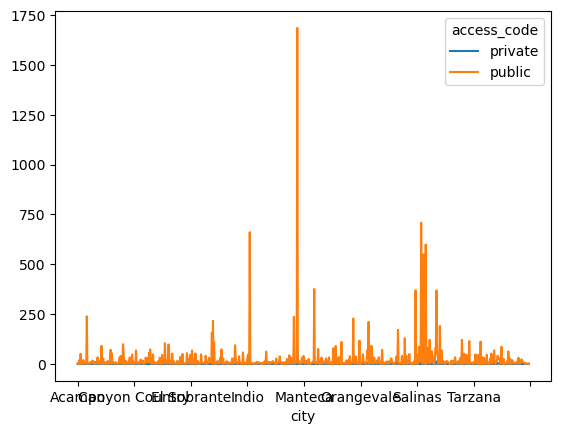

In [31]:
public_by_city.plot()

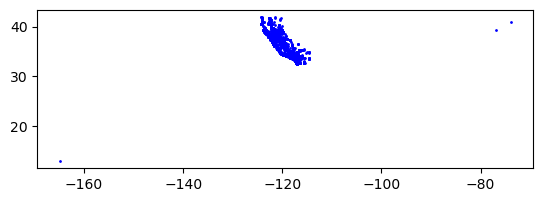

In [32]:
geo_stations = gpd.GeoDataFrame(charging_stations_simple_copy, geometry=gpd.points_from_xy(charging_stations_simple_copy.longitude, charging_stations_simple_copy.latitude))
geo_stations.plot(marker='o', color='blue', markersize=1)
plt.show()
#need to clean data for outlier data points


In order to properly explore the current relationship between EV charging station availability and Calenviroscreen indicators (equity, public health), I will first need to fix the merge (will be visiting Meiqing's office hours). At first glance, it seems that most of the cities in CA have more public charging stations than private ones. The stations are also clustered more towards the coast and central part of the state, while the north and east sides of the state have more scattered stations. For the final project, I intend to evaluate different and individuall indicators found in the Calenviroscreen index against access to EV charging stations. The access will help to inform where investments should be made to facilitate a smoother green energy transition throughout the state. First, I will normalize numbers of stations by population size of census tracts, using open Census API data. Then, I will filter by the bottom 40% of Calenviroscreen census tract scores. This will give a snapshot of the EV charging station network in areas where the state intends to spend most of its funding according to the green energy transition plan. If time allow, it would also be interesting to do a network analysis of the EV charging stations.